In [1]:
using DataFrames
using CSV
using Plots


In [2]:
"""
 Converts a given index to a 2D Matrix Index with the given Matrix size
"""
function getValue(index, xmin, xmax, xlen, ymin, ymax, ylen)
    xstep = (xmax-xmin)/xlen
    ystep = (ymax-ymin)/ylen


    x = (index%xlen) * xstep + xmin
    y = trunc(Int64, index/ylen) * ystep + ymin
    return x,y
end
xs = Vector()

ys = Vector()
for i in 1:nrow(df)
    x, y = getValue(i-1, 3, 10, 40, 0, 2, 60)
    push!(xs, x)
    push!(ys, y)
end


LoadError: UndefVarError: df not defined

In [3]:
xname = "frequency"
yname = "earliest_pickup"

yname = "earliest_pickup"
path = "./current_data/results.csv"
df = DataFrame(CSV.File(path))#"earliest_pickup_try2.csv"))


t0 = 45.339190347724944

sort!(df, [order(xname), order(yname)])

xs = df[!, xname] #* t0
ys = df[!, yname] #/t0
#xs = unique(xs)
#ys = unique(ys)

#print(df)
ks = names(df)
filter!(e->e∉[xname, yname, "occupancy"],ks)
gr()

Plots.GRBackend()

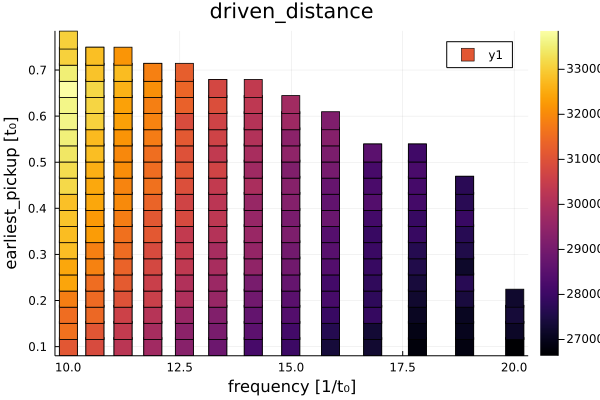

20.014269333588558, 0.7649999999999999, (393,)


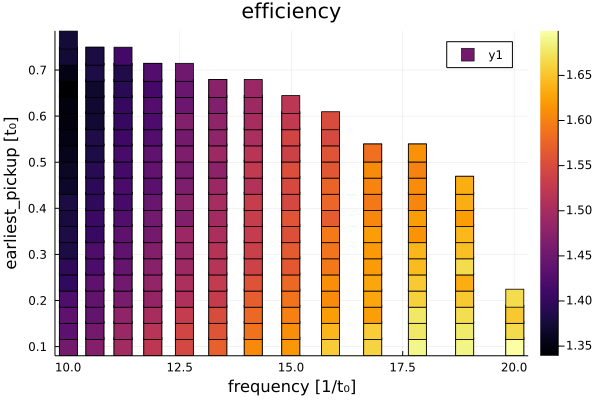

20.014269333588558, 0.7649999999999999, (393,)


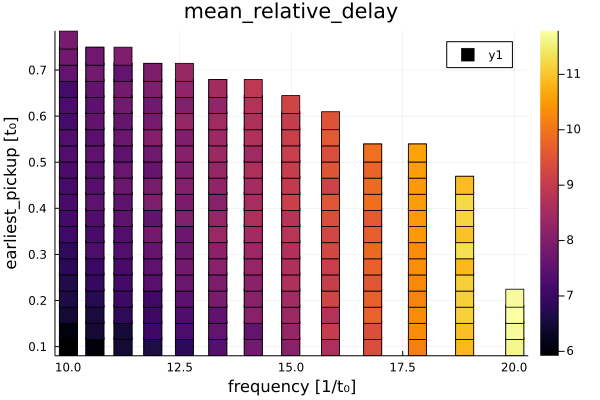

20.014269333588558, 0.7649999999999999, (393,)


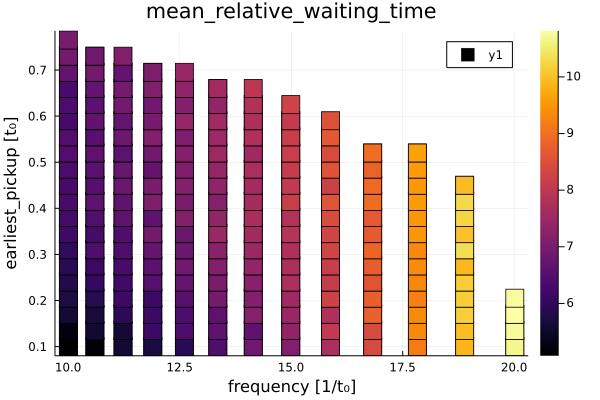

20.014269333588558, 0.7649999999999999, (393,)


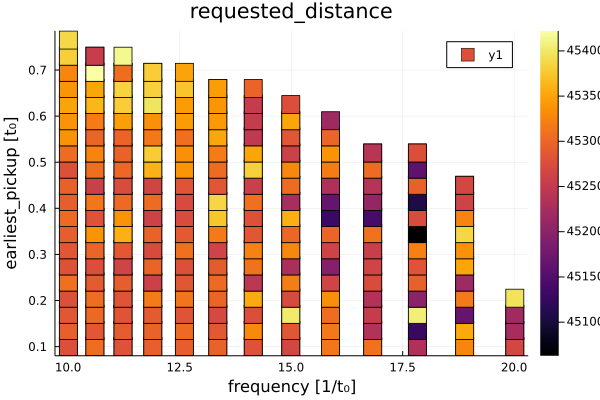

20.014269333588558, 0.7649999999999999, (393,)


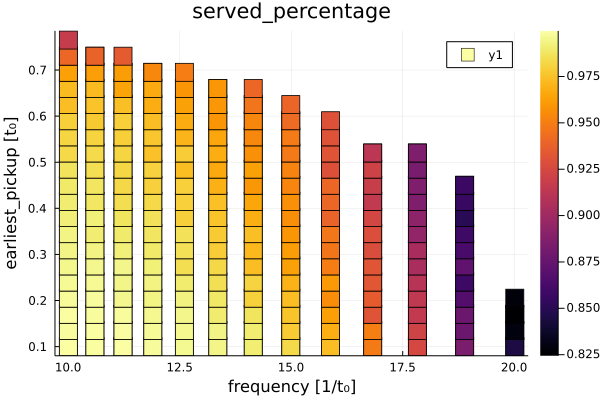

20.014269333588558, 0.7649999999999999, (393,)


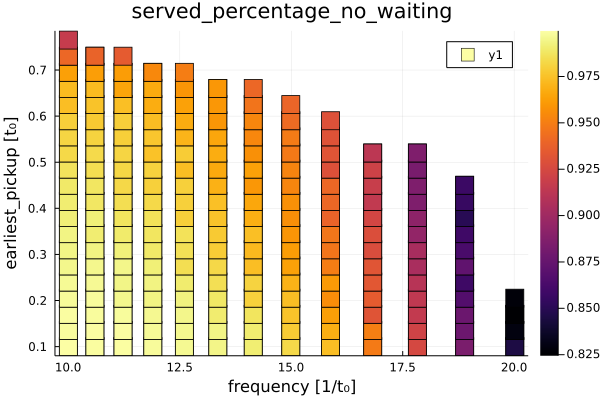

20.014269333588558, 0.7649999999999999, (393,)


In [4]:
#To Visualize processes, that are not yet finished

for name in ks
    data = df[!, name]
    println("$(maximum(df[!, xname])), $(maximum(df[!, yname])), $(size(df[!, name]))")
    p = scatter(df[!, xname], df[!, yname],
            marker_z= data, #attr(cmin=minimum(data), cmax=maximum(data), color=data, colorscale="Bluered")
            marker = (:rect, 9),
            xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
     title="$name",
    
    )
    #xaxis!(:log)
    #yaxis!(:log)
    display(p)
    savefig(p, "results/$name.png")
end

In [6]:
for name in ks
    data = df[!, name]
    #println("$(maximum(df[!, xname])), $(maximum(df[!, yname])), $(size(df[!, name]))")
    # p = scatter(xs, ys,
    #        marker_z= data, #attr(cmin=minimum(data), cmax=maximum(data), color=data, colorscale="Bluered")
    #        markershape = :rect,
    #        xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
    # title="$name"      )
    
    #display(p)
    
    data = reshape(data, (60, 40))
   
    map = heatmap(
    unique(xs), unique(ys), data,
    c=cgrad([:black, :white]),
    xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
    title="$name")
    display(map)
    #savefig(map, "results/$name.png")
end

#TODO Waiting Time
#TODO 

LoadError: DimensionMismatch("new dimensions (60, 40) must be consistent with array size 1128")

LoadError: DimensionMismatch("new dimensions (60, 40) must be consistent with array size 1128")

In [ ]:
if true &&